In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns

In [2]:
df = pd.read_csv('chicago_taxi.csv')
df

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,fec6b8b1c5cd7af9e6dc4e9c8c46fb08987f2e9c,56a1119c6ca57e39525cf06829f9ecff553cf4b5ac2482...,01/24/2020 12:15:00 AM,01/24/2020 12:15:00 AM,322.0,0.80,NaN,NaN,8.0,28.0,...,0.0,5.75,Cash,Medallion Leasin,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.874005,-87.663518,POINT (-87.6635175498 41.874005383)
1,ff5cad1f181d44fe60b9d0a1330f78269511d54a,6acd828b5cde8b4529317e8eda5b4fb9663fa81d1143c9...,01/24/2020 12:15:00 AM,01/24/2020 12:30:00 AM,671.0,5.17,NaN,NaN,8.0,3.0,...,0.0,16.75,Credit Card,Chicago Carriage Cab Corp,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
2,fbe685844176dd7822b6e256efce7fa3f8909e4b,b968bad5a2daed924a10e8ec4fb35513e060a076c575f7...,01/24/2020 12:15:00 AM,01/24/2020 12:30:00 AM,960.0,0.40,NaN,NaN,8.0,3.0,...,0.0,22.60,Credit Card,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
3,fddd99b2c6db17848390d4b57e7fff970e22b413,a4e718943931c99476ac0b332bb99261dd8e15994076bf...,01/24/2020 12:15:00 AM,01/24/2020 12:15:00 AM,120.0,0.00,1.703108e+10,1.703108e+10,8.0,8.0,...,0.0,4.00,Cash,Blue Ribbon Taxi Association Inc.,41.892508,-87.626215,POINT (-87.6262149064 41.8925077809),41.892508,-87.626215,POINT (-87.6262149064 41.8925077809)
4,f9f914b68a3ddb07fba1acf5bfcb5e1c7bb5f3bc,cbdd490649df25aa771979bed8930b199d27a990ccdb42...,01/24/2020 12:15:00 AM,01/24/2020 12:15:00 AM,360.0,1.40,NaN,NaN,28.0,8.0,...,1.0,7.75,No Charge,Star North Management LLC,41.874005,-87.663518,POINT (-87.6635175498 41.874005383),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292777,5bbfd687aafb778e609425ba4621d9e291ef44c0,919ad1eb29141ee529f65193c1347a616239d89cd8c5e1...,01/31/2020 11:45:00 PM,02/01/2020 12:00:00 AM,420.0,0.10,NaN,NaN,28.0,31.0,...,4.5,12.00,Credit Card,Taxi Affiliation Services,41.874005,-87.663518,POINT (-87.6635175498 41.874005383),41.850266,-87.667569,POINT (-87.667569312 41.8502663663)
292778,5b49d22a619c543597c7e09731772f2453f6fbf3,5e6ba3d77c1e1597624402bd204e81b4acbc3bdb103741...,01/31/2020 11:45:00 PM,02/01/2020 12:00:00 AM,1020.0,4.60,NaN,NaN,28.0,8.0,...,0.0,17.80,Credit Card,Taxi Affiliation Services,41.874005,-87.663518,POINT (-87.6635175498 41.874005383),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
292779,587c59ccd2e9c2e0223817faaa58427184a642c0,111d9e472136f46b99422f1e976e81de485f57c2f7f3a8...,01/31/2020 11:45:00 PM,02/01/2020 12:00:00 AM,720.0,2.20,1.703108e+10,1.703133e+10,8.0,33.0,...,0.0,9.75,Cash,Star North Management LLC,41.892508,-87.626215,POINT (-87.6262149064 41.8925077809),41.859350,-87.617358,POINT (-87.6173580061 41.859349715)
292780,585d981c08bb404e5ec19b470a67f573a16152da,2c6ef81b0ba1f2bbe58cb63f171b872e9e3f53d4c34a3c...,01/31/2020 11:45:00 PM,02/01/2020 12:00:00 AM,805.0,3.34,NaN,NaN,8.0,7.0,...,0.0,13.80,Mobile,City Service,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)


## Preprocessing

In [3]:
df.shape

(292782, 23)

In [4]:
df.dtypes

Trip ID                        object
Taxi ID                        object
Trip Start Timestamp           object
Trip End Timestamp             object
Trip Seconds                  float64
Trip Miles                    float64
Pickup Census Tract           float64
Dropoff Census Tract          float64
Pickup Community Area         float64
Dropoff Community Area        float64
Fare                          float64
Tips                          float64
Tolls                         float64
Extras                        float64
Trip Total                    float64
Payment Type                   object
Company                        object
Pickup Centroid Latitude      float64
Pickup Centroid Longitude     float64
Pickup Centroid Location       object
Dropoff Centroid Latitude     float64
Dropoff Centroid Longitude    float64
Dropoff Centroid  Location     object
dtype: object

In [3]:
# coordinates before resampling and interpolation
print('Minimum Coordinates: ', df['Pickup Centroid Latitude'].min(), df['Pickup Centroid Longitude'].min())
print('Maximum Coordinates: ', df['Pickup Centroid Latitude'].max(), df['Pickup Centroid Longitude'].max())

Minimum Coordinates:  41.660136051 -87.913624596
Maximum Coordinates:  42.009622881 -87.53490290100001


In [6]:
df.columns

Index(['Trip ID', 'Taxi ID', 'Trip Start Timestamp', 'Trip End Timestamp',
       'Trip Seconds', 'Trip Miles', 'Pickup Census Tract',
       'Dropoff Census Tract', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tips', 'Tolls', 'Extras',
       'Trip Total', 'Payment Type', 'Company', 'Pickup Centroid Latitude',
       'Pickup Centroid Longitude', 'Pickup Centroid Location',
       'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude',
       'Dropoff Centroid  Location'],
      dtype='object')

In [4]:
pickup_locs = ['Pickup Centroid Latitude', 'Pickup Centroid Longitude']

for i in range(len(pickup_locs)):
    isMissing = df[pickup_locs[i]].isna().sum()
    print('Number of missing pickup coordinates: ', isMissing)


Number of missing pickup coordinates:  19711
Number of missing pickup coordinates:  19711


In [8]:
missing_pickup_df = df.loc[(df[pickup_locs[0]].isna() == True), :]
missing_pickup_df

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
17,eac9ac8edd234c4c513fb1f44ae792ebe223d5b3,850264f1f7a1a4af93548322988520f577f0eb28a0ae38...,01/24/2020 12:15:00 AM,01/24/2020 12:15:00 AM,0.0,0.00,NaN,NaN,NaN,NaN,...,15.0,18.25,Dispute,5062 - 34841 Sam Mestas,NaN,NaN,NaN,NaN,NaN,NaN
30,dfc9fe9162e4811f95f0469562093e7b66782b2f,31a06a77a2b473e41aea8ee60fabb45b6a4fd836626be6...,01/24/2020 12:15:00 AM,01/24/2020 12:30:00 AM,702.0,5.90,NaN,NaN,NaN,NaN,...,0.0,19.00,Credit Card,City Service,NaN,NaN,NaN,NaN,NaN,NaN
40,d83581553ee2f22551388b787dd647c490081385,5972edb97ae53140d2e4cb8549f1527d9d93491acef5a2...,01/24/2020 12:15:00 AM,01/24/2020 12:30:00 AM,1260.0,10.70,NaN,NaN,NaN,NaN,...,4.0,40.40,Credit Card,"Taxicab Insurance Agency, LLC",NaN,NaN,NaN,NaN,NaN,NaN
49,ce09daf28bf25f3d21e5416e923b2489e09aecec,829eabd1f1bba205572e6f6c9fa1523e83d5932173883c...,01/24/2020 12:15:00 AM,01/24/2020 12:15:00 AM,0.0,0.00,NaN,NaN,NaN,NaN,...,0.0,28.00,Credit Card,Taxi Affiliation Services,NaN,NaN,NaN,NaN,NaN,NaN
60,bfafcf61881be88c3f4aa223d5f899fcd5322eac,840820f7de42b62286711ce2e9f1ccfda9032ba6294f65...,01/24/2020 12:15:00 AM,01/24/2020 01:00:00 AM,2460.0,1.30,NaN,NaN,NaN,NaN,...,4.0,54.75,Cash,Blue Ribbon Taxi Association Inc.,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292747,74924950a31c7b1eb31b0365cc9d95de3f11458c,4a20ebb023f07066c94f8aa64453ff9991c21ed10791ed...,01/31/2020 11:45:00 PM,01/31/2020 11:45:00 PM,48.0,0.09,NaN,NaN,NaN,NaN,...,0.0,3.25,Cash,Flash Cab,NaN,NaN,NaN,NaN,NaN,NaN
292753,72fe97a77eb48c6774086eb7624bc0241df079c0,5cffb97a6fd517bd5bc14f2d55ded4698066eb285e8c02...,01/31/2020 11:45:00 PM,02/01/2020 12:30:00 AM,2574.0,27.27,NaN,NaN,NaN,NaN,...,4.0,70.25,Cash,Flash Cab,NaN,NaN,NaN,NaN,NaN,NaN
292766,686a2b08b451fa4d7157be0868173c370e8fd32c,59cfe5aef1ecdd4418c373fe7848fb1f9defcbcfe70f17...,01/31/2020 11:45:00 PM,01/31/2020 11:45:00 PM,165.0,0.32,NaN,NaN,NaN,NaN,...,0.0,4.75,Mobile,Flash Cab,NaN,NaN,NaN,NaN,NaN,NaN
292773,62972aed743b618d91831baf44f610da1136ed06,ec4b4f2f183bf84a4a4bd5b8df2ce0f94b98c05c06cb1a...,01/31/2020 11:45:00 PM,02/01/2020 12:00:00 AM,1134.0,6.40,NaN,NaN,NaN,NaN,...,1.5,24.15,Credit Card,Metro Jet Taxi A,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
missing_pickup_df.nunique()

Trip ID                       19711
Taxi ID                        1731
Trip Start Timestamp            759
Trip End Timestamp              767
Trip Seconds                   2933
Trip Miles                     2095
Pickup Census Tract              34
Dropoff Census Tract            129
Pickup Community Area             0
Dropoff Community Area           76
Fare                            576
Tips                            651
Tolls                             9
Extras                          141
Trip Total                     1425
Payment Type                      8
Company                          32
Pickup Centroid Latitude          0
Pickup Centroid Longitude         0
Pickup Centroid Location          0
Dropoff Centroid Latitude       169
Dropoff Centroid Longitude      169
Dropoff Centroid  Location      169
dtype: int64

Due to the large number of NAs, I did not feel comfortable in dropping all observations with missing Pickup Coordinates since they are the variables I plan to train my clustering model on. Thus, I start to explore possible ways to impute these missing values by checking some columns.   

In [10]:
missing_pickup_df['Trip Miles'].unique()

array([ 0.  ,  5.9 , 10.7 , ...,  4.24,  7.79, 14.46])

In [11]:
missing_pickup_df['Trip Seconds'].unique()

array([   0.,  702., 1260., ..., 5100., 2564., 2574.])

In [12]:
df['Pickup Community Area'].unique()

array([ 8., 28.,  7., 77., 32., nan, 76., 10.,  6., 33., 21., 14., 56.,
        3., 16., 41., 48.,  5., 11., 24.,  4., 22., 13., 23., 29.,  2.,
       43., 67.,  1., 25., 27., 64., 30., 40., 60., 46., 15., 69., 75.,
       38., 42., 37., 45., 39., 71., 19., 35., 44., 12., 63., 17., 49.,
       66., 54., 50., 34.,  9., 53., 74., 70., 57., 36., 73., 20., 59.,
       31., 51., 52., 65., 58., 61., 26., 72., 68., 55., 18., 47., 62.])

In [13]:
df['Company'].unique()

array(['Medallion Leasin', 'Chicago Carriage Cab Corp',
       'Taxi Affiliation Services', 'Blue Ribbon Taxi Association Inc.',
       'Star North Management LLC', 'Flash Cab', 'City Service',
       'Setare Inc', '5062 - 34841 Sam Mestas',
       '3011 - 66308 JBL Cab Inc.', 'KOAM Taxi Association',
       'Chicago Taxicab', '312 Medallion Management Corp',
       'Taxicab Insurance Agency, LLC', 'Choice Taxi Association',
       'Top Cab Affiliation', 'Sun Taxi', 'Chicago Independents',
       '24 Seven Taxi', 'Nova Taxi Affiliation Llc',
       'Patriot Taxi Dba Peace Taxi Associat', 'Leonard Cab Co',
       '5 Star Taxi', 'Chicago Medallion Management',
       'Suburban Dispatch LLC', 'Taxi Affiliation Service Yellow',
       'U Taxicab', 'Metro Jet Taxi A', '5874 - 73628 Sergey Cab Corp.',
       'Petani Cab Corp', '6574 - Babylon Express Inc.',
       '3623 - 72222 Arrington Enterprises', 'Blue Diamond',
       '3620 - 52292 David K. Cab Corp.',
       '3721 - Santamaria Express

After some thought, I decided to fill the missing values with a generalization method called interpolation. I transformed the data in a way that groups the observations by taxi companies and finds the average Pickup Centroid Latitude and Longitude by each day of data recorded. Note that there is no guarantee this is a smart move. One important thought I kept in mind is that if I need to interpolate data that estimates the pickup location of a recorded taxi ride, it does not make much sense to interpolate the pickup location using the available pickup locations of future dates since it is still unknown at the time the taxi ride occurred.

In [5]:
impute_df = df.copy() # get copy of original data frame
impute_df['Trip Date'] = pd.to_datetime(impute_df['Trip Start Timestamp'])

In [15]:
impute_df['Trip Start Timestamp'].unique()

array(['01/24/2020 12:15:00 AM', '01/24/2020 12:30:00 AM',
       '01/24/2020 12:45:00 AM', '01/24/2020 01:00:00 AM',
       '01/24/2020 01:15:00 AM', '01/24/2020 01:30:00 AM',
       '01/24/2020 01:45:00 AM', '01/24/2020 02:00:00 AM',
       '01/24/2020 02:15:00 AM', '01/24/2020 02:30:00 AM',
       '01/24/2020 02:45:00 AM', '01/24/2020 03:00:00 AM',
       '01/24/2020 03:15:00 AM', '01/24/2020 03:30:00 AM',
       '01/24/2020 03:45:00 AM', '01/24/2020 04:00:00 AM',
       '01/24/2020 04:15:00 AM', '01/24/2020 04:30:00 AM',
       '01/24/2020 04:45:00 AM', '01/24/2020 05:00:00 AM',
       '01/24/2020 05:15:00 AM', '01/24/2020 05:30:00 AM',
       '01/24/2020 05:45:00 AM', '01/24/2020 06:00:00 AM',
       '01/24/2020 06:15:00 AM', '01/24/2020 06:30:00 AM',
       '01/24/2020 06:45:00 AM', '01/24/2020 07:00:00 AM',
       '01/24/2020 07:15:00 AM', '01/24/2020 07:30:00 AM',
       '01/24/2020 07:45:00 AM', '01/24/2020 08:00:00 AM',
       '01/24/2020 08:15:00 AM', '01/24/2020 08:30:00 AM

In [6]:
impute_df.index = impute_df['Trip Date']

In [17]:
impute_df.shape # original df shape

(292782, 24)

In [18]:
impute_df.groupby('Company').resample('D').mean()

Trip Seconds  Trip Miles  \
Company                     Trip Date                              
1085 - 72312 N and W Cab Co 2020-01-25    795.000000    3.537500   
                            2020-01-26   1155.000000   10.075000   
                            2020-01-27    485.000000    1.745833   
                            2020-01-28    533.333333    1.461111   
                            2020-01-29    517.894737    1.621053   
...                                              ...         ...   
U Taxicab                   2020-01-27    830.571429    5.474286   
                            2020-01-28    706.849315    3.552055   
                            2020-01-29    691.084337    3.333735   
                            2020-01-30    683.125000    3.141667   
                            2020-01-31    710.704225    2.615493   

                                        Pickup Census Tract  \
Company                     Trip Date                         
1085 - 72312 N and W Cab Co 2020-01-25                  NaN   
                            2020-01-26                  NaN   
                            2020-01-27                  NaN   
                            2020-01-28                  NaN   
                            2020-01-29                  NaN   
...                                                     ...   
U Taxicab                   2020-01-27         1.703164e+10   
                            2020-01-28         1.703146e+10   
                            2020-01-29         1.703150e+10   
                            2020-01-30         1.703157e+10   
                            2020-01-31         1.703149e+10   

                                        Dropoff Census Tract  \
Company                     Trip Date                          
1085 - 72312 N and W Cab Co 2020-01-25                   NaN   
                            2020-01-26                   NaN   
                            2020-01-27                   NaN   
                            2020-01-28                   NaN   
                            2020-01-29                   NaN   
...                                                      ...   
U Taxicab                   2020-01-27          1.703139e+10   
                            2020-01-28          1.703147e+10   
                            2020-01-29          1.703145e+10   
                            2020-01-30          1.703133e+10   
                            2020-01-31          1.703135e+10   

                                        Pickup Community Area  \
Company                     Trip Date                           
1085 - 72312 N and W Cab Co 2020-01-25                    NaN   
                            2020-01-26                    NaN   
                            2020-01-27                    NaN   
                            2020-01-28                    NaN   
                            2020-01-29                    NaN   
...                                                       ...   
U Taxicab                   2020-01-27              39.814815   
                            2020-01-28              28.367647   
                            2020-01-29              30.029851   
                            2020-01-30              30.674699   
                            2020-01-31              24.605634   

                                        Dropoff Community Area       Fare  \
Company                     Trip Date                                       
1085 - 72312 N and W Cab Co 2020-01-25                     NaN  13.531250   
                            2020-01-26                     NaN  26.562500   
                            2020-01-27                     NaN   8.031250   
                            2020-01-28                     NaN   7.986111   
                            2020-01-29                     NaN   7.842105   
...                                                        ...        ...   
U Taxicab                   2020-01-27  

In [7]:
df_interpol = impute_df.groupby('Company').resample('D').mean()

In [20]:
df_interpol.shape

(376, 15)

In [21]:
df_interpol.columns # all non-numerical columns are removed in resample function

Index(['Trip Seconds', 'Trip Miles', 'Pickup Census Tract',
       'Dropoff Census Tract', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tips', 'Tolls', 'Extras',
       'Trip Total', 'Pickup Centroid Latitude', 'Pickup Centroid Longitude',
       'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude'],
      dtype='object')

In [8]:
df_interpol['Pickup Centroid Latitude'] = df_interpol['Pickup Centroid Latitude'].interpolate()
df_interpol['Pickup Centroid Longitude'] = df_interpol['Pickup Centroid Longitude'].interpolate()
df_interpol

Trip Seconds  Trip Miles  \
Company                     Trip Date                              
1085 - 72312 N and W Cab Co 2020-01-25    795.000000    3.537500   
                            2020-01-26   1155.000000   10.075000   
                            2020-01-27    485.000000    1.745833   
                            2020-01-28    533.333333    1.461111   
                            2020-01-29    517.894737    1.621053   
...                                              ...         ...   
U Taxicab                   2020-01-27    830.571429    5.474286   
                            2020-01-28    706.849315    3.552055   
                            2020-01-29    691.084337    3.333735   
                            2020-01-30    683.125000    3.141667   
                            2020-01-31    710.704225    2.615493   

                                        Pickup Census Tract  \
Company                     Trip Date                         
1085 - 72312 N and W Cab Co 2020-01-25                  NaN   
                            2020-01-26                  NaN   
                            2020-01-27                  NaN   
                            2020-01-28                  NaN   
                            2020-01-29                  NaN   
...                                                     ...   
U Taxicab                   2020-01-27         1.703164e+10   
                            2020-01-28         1.703146e+10   
                            2020-01-29         1.703150e+10   
                            2020-01-30         1.703157e+10   
                            2020-01-31         1.703149e+10   

                                        Dropoff Census Tract  \
Company                     Trip Date                          
1085 - 72312 N and W Cab Co 2020-01-25                   NaN   
                            2020-01-26                   NaN   
                            2020-01-27                   NaN   
                            2020-01-28                   NaN   
                            2020-01-29                   NaN   
...                                                      ...   
U Taxicab                   2020-01-27          1.703139e+10   
                            2020-01-28          1.703147e+10   
                            2020-01-29          1.703145e+10   
                            2020-01-30          1.703133e+10   
                            2020-01-31          1.703135e+10   

                                        Pickup Community Area  \
Company                     Trip Date                           
1085 - 72312 N and W Cab Co 2020-01-25                    NaN   
                            2020-01-26                    NaN   
                            2020-01-27                    NaN   
                            2020-01-28                    NaN   
                            2020-01-29                    NaN   
...                                                       ...   
U Taxicab                   2020-01-27              39.814815   
                            2020-01-28              28.367647   
                            2020-01-29              30.029851   
                            2020-01-30              30.674699   
                            2020-01-31              24.605634   

                                        Dropoff Community Area       Fare  \
Company                     Trip Date                                       
1085 - 72312 N and W Cab Co 2020-01-25                     NaN  13.531250   
                            2020-01-26                     NaN  26.562500   
                            2020-01-27                     NaN   8.031250   
                            2020-01-28                     NaN   7.986111   
                            2020-01-29                     NaN   7.842105   
...                                                        ...        ...   
U Taxicab                   2020-01-27  

In [23]:
df_interpol.shape

(376, 15)

In [24]:
df_interpol.isna().sum()

Trip Seconds                  20
Trip Miles                    20
Pickup Census Tract           57
Dropoff Census Tract          57
Pickup Community Area         49
Dropoff Community Area        49
Fare                          20
Tips                          20
Tolls                         20
Extras                        20
Trip Total                    20
Pickup Centroid Latitude       7
Pickup Centroid Longitude      7
Dropoff Centroid Latitude     49
Dropoff Centroid Longitude    49
dtype: int64

In [9]:
print('Minimum Coordinates: ', df_interpol['Pickup Centroid Latitude'].min(), df_interpol['Pickup Centroid Longitude'].min())
print('Maximum Coordinates: ', df_interpol['Pickup Centroid Latitude'].max(), df_interpol['Pickup Centroid Longitude'].max())

Minimum Coordinates:  41.715320824 -87.913624596
Maximum Coordinates:  41.990917671 -87.60623025057143


In [10]:
# ignore "1085 - 72312 N and W Cab Co" for now since its average Pickup Centroid coordinates are still missing
# this may be due to the fact that there is no pickup location info available from this company to start with
# since we are finding the average pickup locations by day for each company

filled_df = df_interpol.reset_index()

In [11]:
index_names = filled_df[(filled_df['Pickup Centroid Latitude'].isna() == True)].index

In [12]:
filled_df = filled_df.drop(index_names)
filled_df = filled_df.reset_index().drop(['index'], axis = 1)
filled_df['Trip Date'] = filled_df['Trip Date'].dt.date

In [29]:
filled_df.dtypes

Company                        object
Trip Date                      object
Trip Seconds                  float64
Trip Miles                    float64
Pickup Census Tract           float64
Dropoff Census Tract          float64
Pickup Community Area         float64
Dropoff Community Area        float64
Fare                          float64
Tips                          float64
Tolls                         float64
Extras                        float64
Trip Total                    float64
Pickup Centroid Latitude      float64
Pickup Centroid Longitude     float64
Dropoff Centroid Latitude     float64
Dropoff Centroid Longitude    float64
dtype: object

In [13]:
filled_df = filled_df.iloc[:, [0,1,13,14]]
filled_df

,Company,Trip Date,Pickup Centroid Latitude,Pickup Centroid Longitude
0,2092 - 61288 Sbeih company,2020-01-24,41.929313,-87.747249
1,2092 - 61288 Sbeih company,2020-01-25,41.979071,-87.903040
2,2092 - 61288 Sbeih company,2020-01-26,41.932188,-87.749242
3,2092 - 61288 Sbeih company,2020-01-27,41.946230,-87.797779
4,2092 - 61288 Sbeih company,2020-01-28,41.895002,-87.659471
...,...,...,...,...
364,U Taxicab,2020-01-27,41.908704,-87.709599
365,U Taxicab,2020-01-28,41.897762,-87.667071
366,U Taxicab,2020-01-29,41.902419,-87.677806
367,U Taxicab,2020-01-30,41.892913,-87.665734


In [14]:
# if date and company match corresponding observations in original df, insert the Pickup Centroid Lat and Long
dfC = df.copy()
dfC['Trip Date'] = pd.to_datetime(dfC['Trip Start Timestamp']).dt.date

In [15]:
dfC = dfC.iloc[:,[16,17,18,23]]
dfC

,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Trip Date
0,Medallion Leasin,41.899602,-87.633308,2020-01-24
1,Chicago Carriage Cab Corp,41.899602,-87.633308,2020-01-24
2,Taxi Affiliation Services,41.899602,-87.633308,2020-01-24
3,Blue Ribbon Taxi Association Inc.,41.892508,-87.626215,2020-01-24
4,Star North Management LLC,41.874005,-87.663518,2020-01-24
...,...,...,...,...
292777,Taxi Affiliation Services,41.874005,-87.663518,2020-01-31
292778,Taxi Affiliation Services,41.874005,-87.663518,2020-01-31
292779,Star North Management LLC,41.892508,-87.626215,2020-01-31
292780,City Service,41.899602,-87.633308,2020-01-31


In [16]:
new_df = dfC.merge(filled_df, on = ['Company', 'Trip Date'], how = 'left')

In [34]:
new_df.isna().sum()

Company                            0
Pickup Centroid Latitude_x     19711
Pickup Centroid Longitude_x    19711
Trip Date                          0
Pickup Centroid Latitude_y        98
Pickup Centroid Longitude_y       98
dtype: int64

In [17]:
#new_df.loc[(new_df['Pickup Centroid Latitude_x'].isna() == True), 'Pickup Centroid Latitude_x'] = new_df
new_df['Pickup Centroid Latitude'] = new_df['Pickup Centroid Latitude_x'].fillna(new_df['Pickup Centroid Latitude_y'])
new_df['Pickup Centroid Longitude'] = new_df['Pickup Centroid Longitude_x'].fillna(new_df['Pickup Centroid Longitude_y'])

In [36]:
# 98 missing coordinates are coming from "1085 - 72312 N and W Cab Co"
new_df.isna().sum()

Company                            0
Pickup Centroid Latitude_x     19711
Pickup Centroid Longitude_x    19711
Trip Date                          0
Pickup Centroid Latitude_y        98
Pickup Centroid Longitude_y       98
Pickup Centroid Latitude          98
Pickup Centroid Longitude         98
dtype: int64

In [18]:
# drop all rows with "1085 - 72312 N and W Cab Co" as the company
co_index = new_df[(new_df['Pickup Centroid Latitude'].isna() == True)].index
new_df = new_df.drop(co_index).reset_index()
drop_cols = new_df[['Pickup Centroid Latitude_x', 'Pickup Centroid Longitude_x', 'Trip Date', 'Pickup Centroid Latitude_y', 'Pickup Centroid Longitude_y', 'Company', 'index']]
new_df = new_df.drop(drop_cols, axis = 1)
new_df.head()

,Pickup Centroid Latitude,Pickup Centroid Longitude
0,41.899602,-87.633308
1,41.899602,-87.633308
2,41.899602,-87.633308
3,41.892508,-87.626215
4,41.874005,-87.663518


## Run clustering algorithms

Since this is one of the most standard, popular clustering algorithms we discussed in class, I decided to first run K-Means on a subset of this dataset to get a general sense of its performance and attempt to better understand the distribution of points across each cluster relative to the centroid. The disadvantage of K-Means is that we need to specify the number of clusters, whose predefined value can have a major impact on the results. Since it assumes that the data points in each cluster are located in a spherical manner around each of the *k* cluster centroids, it suggests this algorithm may not work very well with oddly-shaped data. It is limited in ability in that it only considers the distance to the nearest cluster centroid/mean. In many situations, it is also challenging to discern what a reasonable *k* value is beforehand.

In [25]:
# perform k-means clustering on the preprocessed data
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [28]:
subsetSize = new_df.shape[0]/4
subset_df = new_df.loc[:subsetSize]
scaler = StandardScaler()
scaled_coords = scaler.fit_transform(subset_df)
print(len(scaled_coords))

73172


In [40]:
scaled_coords.mean(axis = 0)

array([1.69531995e-13, 4.80264780e-13])

In [41]:
scaled_coords.std(axis = 0)

array([1., 1.])

In [29]:
kmeans = KMeans(n_clusters = 5, random_state = 0).fit(scaled_coords)
labels = kmeans.labels_
np.set_printoptions(threshold = np.inf)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0,
       1, 1, 4, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 4, 0, 0, 0, 1, 0, 4, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0,
       4, 0, 0, 1, 3, 0, 1, 0, 0, 0, 2, 4, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 4, 0, 0, 0, 1, 0, 4, 0, 3, 0, 1, 4, 0, 0, 0, 4, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 3, 3, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 3, 0, 0, 1, 2, 0, 0, 0, 3, 0, 0, 1, 1, 4, 0, 0, 0, 0,
       4, 0, 4, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 4, 0, 0, 1, 3, 0, 4, 0,
       0, 2, 0, 0, 4, 0, 1, 2, 0, 1, 0, 0, 4, 0, 0, 4, 0, 1, 4, 0, 0, 4,
       1, 0, 0, 2, 1, 0, 0, 4, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 4, 4, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 4, 1, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0,

In [30]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.27656638,  0.3665226 ],
       [ 2.04248373, -3.33209718],
       [ 2.04829807, -0.37787098],
       [-3.07245378, -0.17137813],
       [ 0.63021549, -0.08157399]])

Text(0.5, 1.0, 'K-Means on Chicago Taxi Data (k=5)')

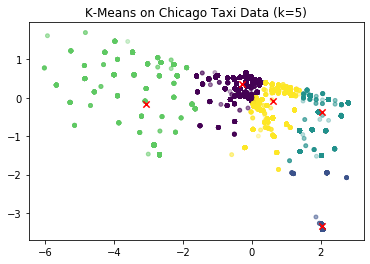

In [31]:
plt.scatter(scaled_coords[:,0], scaled_coords[:,1], c = labels, s = 15, alpha = 0.3)
plt.scatter(centroids[:,0], centroids[:,1], c = 'red', s = 40, alpha = 1, marker = 'x')
plt.title("K-Means on Chicago Taxi Data (k=5)")

Based on the scatterplot, it appears that the distribution of the taxi pickup coordinates is not quite in a spherical manner. Additionally, the clusters are not very tight.

In [32]:
# finding optimal number of clusters
sum_of_squared_distances = pd.DataFrame(data = [], index = range(2,15), columns = ['inertia'])

for k in range(2, 15):
    trial_kmeans = KMeans(n_clusters = k)
    cutoff = 99
    trial_kmeans.fit(scaled_coords)
    sum_of_squared_distances.loc[k] = trial_kmeans.inertia_

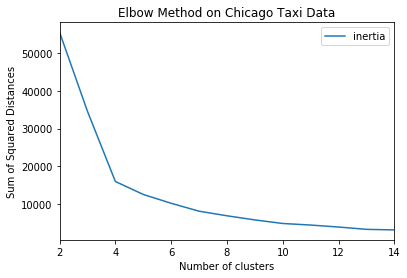

In [33]:
ax = plt.gca()

sum_of_squared_distances.plot(kind = 'line', y = 'inertia', ax = ax)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method on Chicago Taxi Data')
plt.show()

We can refer to the "elbow method" to discover the optimal number of clusters, which ideally reduces inertia or the within-cluster sum-of-squares. From the line graph above, we see an elbow begin to form at k = 7. Let's visualize the outcome when k = 7.

Text(0.5, 1.0, 'K-Means on Chicago Taxi Data (k=7)')

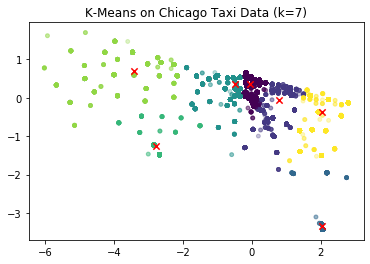

In [34]:
kmeans2 = KMeans(n_clusters = 7).fit(scaled_coords)
labels2 = kmeans2.labels_
centroids2 = kmeans2.cluster_centers_

plt.scatter(scaled_coords[:,0], scaled_coords[:,1], c = labels2, s = 15, alpha = 0.3)
plt.scatter(centroids2[:,0], centroids2[:,1], c = 'red', s = 40, alpha = 1, marker = 'x')
plt.title("K-Means on Chicago Taxi Data (k=7)")

Again, not all clusters are tight. This is related to our previous finding that the data is non-spherical. This may cause the model to cluster loosely related observations together, which is not ideal for our goal of identifying distinct groups in the data, distinct taxi pickup location groups in Chicago. In other words, a shortcoming of the algorithm is how all points in the data will eventually belong to a cluster.

In [35]:
kmeans_sil_score = metrics.silhouette_score(scaled_coords, labels)
print('Silhouette Coefficient (k=5): %0.3f' % kmeans_sil_score)

Silhouette Coefficient (k=5): 0.630


In [36]:
kmeans_sil_score2 = metrics.silhouette_score(scaled_coords, labels2)
print('Silhouette Coefficient (k=7): %0.3f' % kmeans_sil_score2)

Silhouette Coefficient (k=7): 0.501


The silhouette scores on both K-Means outcomes are not as strong as that of the DBSCAN outcome below.

In [48]:
# perform DBSCAN on the dataset
from sklearn.cluster import DBSCAN

Since the shape of this dataset is random in the sense it follows a geographic distribution as we are trying to group *n* transportation requests around a geographic coordinate, I decided to try running DBSCAN on the data. It may be useful for detecting outliers. Being able to train our model on the data without defining the number of necessary clusters in advance seems to be more ideal for defining taxi pickup zones. 

In [49]:
dbscaler = StandardScaler()
dbscaled_coords = dbscaler.fit_transform(subset_df)
print(len(dbscaled_coords))

73172


In [50]:
# kernel kept on dying while running DBSCAN on full dataset (~200,000+ observations)
# so i turned to the alternative of running the algorithm on a subset of the data

# eps: the threshold one point must obey to be in the same cluster
# min_samples: the minimum # of data points needed to determine a single cluster
dbscan = DBSCAN(eps = 0.5, min_samples = 10).fit(dbscaled_coords)
db_labels = dbscan.labels_ # storing labels formed by DBSCAN
np.set_printoptions(threshold = np.inf)
db_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,
        0,  1,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  1,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  1,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        1,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

Text(0.5, 1.0, 'DBSCAN on Chicago Taxi Data')

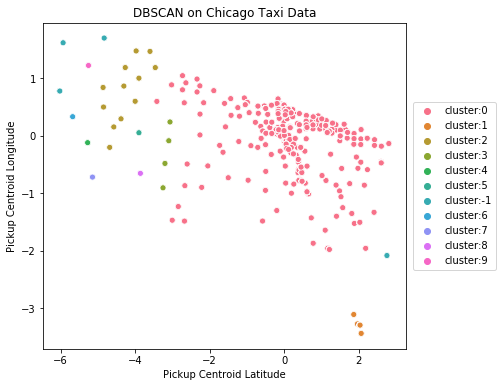

In [57]:
fig = plt.figure(figsize = (6.5,6))
sns.scatterplot(dbscaled_coords[:, 0], dbscaled_coords[:, 1], hue = ["cluster:{}".format(x) for x in db_labels] )
plt.legend(bbox_to_anchor=(1.25, 0.5), loc='center right', borderaxespad=0.)

plt.xlabel('Pickup Centroid Latitude')
plt.ylabel('Pickup Centroid Longitude')
plt.title("DBSCAN on Chicago Taxi Data")

Above is the outcome of DBSCAN when eps = 0.5 and min_samples = 10. The performance of DBSCAN is noticeably slower than that of KMeans. We can also see that a few outliers were detected, which was not clear in the previous KMeans plots. 

In [58]:
# identify core samples
core_samples = np.zeros_like(db_labels, dtype = bool) # return an array of zeros w/same shape and type as given array
core_samples[dbscan.core_sample_indices_] = True
print(core_samples)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [59]:
# declare the number of clusters
n_clusters = len(set(db_labels)) - (1 if -1 in labels else 0)
print(n_clusters)

11


In [60]:
sil_score = metrics.silhouette_score(dbscaled_coords, db_labels)
print('Silhouette Coefficient: %0.3f' % sil_score)

Silhouette Coefficient: 0.726


I used the Silhouette Score to evaluate the outcome of the DBSCAN model. Because it is calculated using the mean intra-cluster distance between points + the mean nearest-cluster distance, a highly-densed cluster that is *also* far away from the next nearest cluster results in a good silhouette score (meaning closer to 1). Due to DBSCAN's ability to handle complex data shapes, I did expect this model to at least perform a bit better than KMeans.

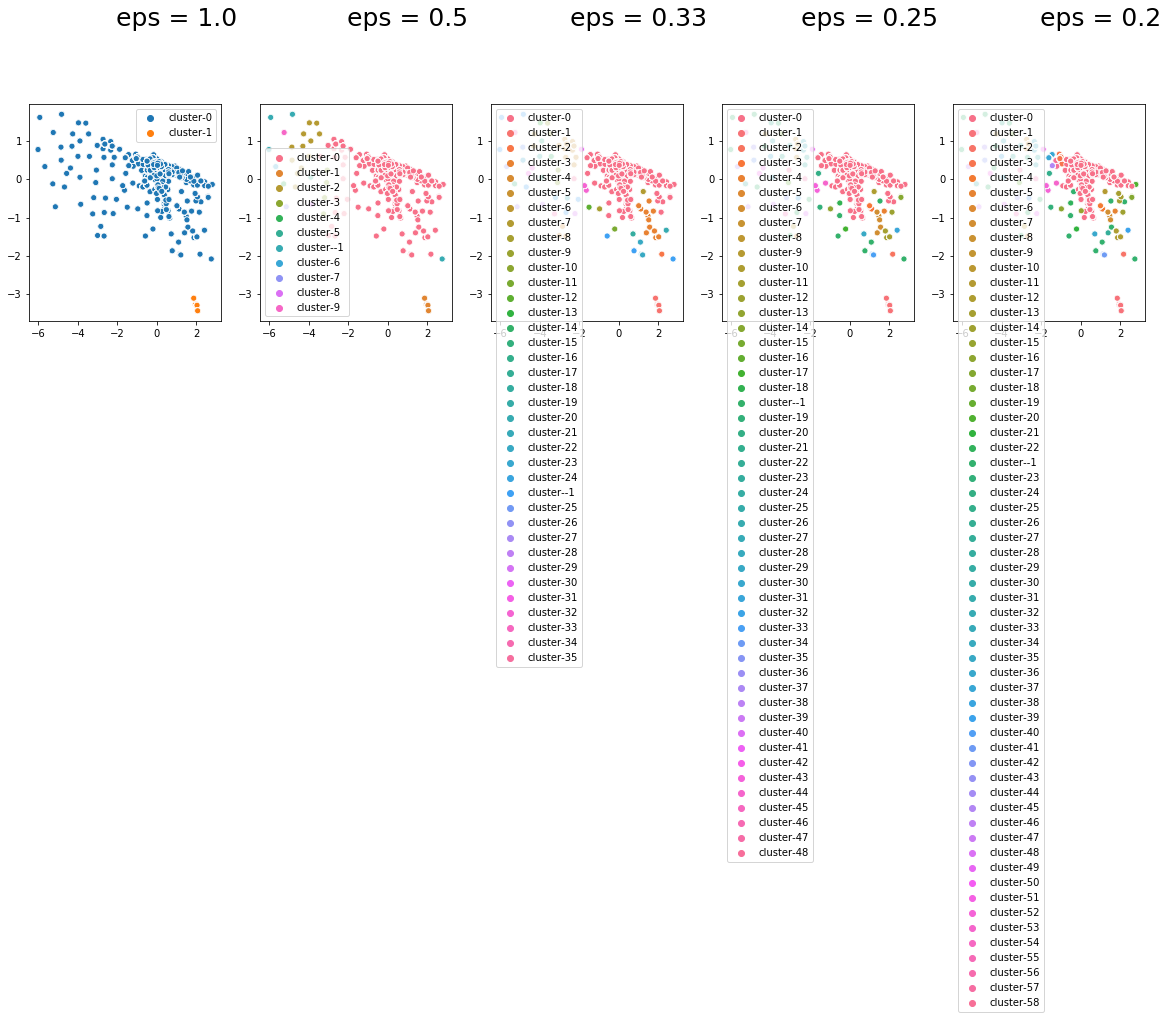

In [63]:
# run DBSCAN x number of times to observe optimal epsilon parameter

# fig = plt.figure(figsize=(20, 10))
# fig.subplots_adjust(hspace=.5, wspace=.2)
# i = 1

# for x in range(10, 5, -1):
#     eps = 1/(11-x)
#     db_scan_trials = DBSCAN(eps = eps, min_samples=10).fit(dbscaled_coords)
#     core_samples_mask = np.zeros_like(db_scan_trials.labels_, dtype=bool)
#     core_samples_mask[db_scan_trials.core_sample_indices_] = True
#     db_trials_labels = db_scan_trials.labels_
    
#     ax = fig.add_subplot(2, 5, i)
#     ax.text(1, 4, "eps = {}".format(round(eps, 2)), fontsize=25, ha="center")
#     sns.scatterplot(dbscaled_coords[:,0], dbscaled_coords[:,1], hue=["cluster-{}".format(x) for x in db_trials_labels])
    
#     i += 1
    
# plt.savefig("dbscan_multi_eps.png", dpi=300)

One challenge I encountered is setting the optimal value for the epsilon parameter. In the submitted image file "dbscan_multi_eps.png" from running the above cell, a larger epsilon value makes the mistake of grouping dispered data points into one cluster, whereas a smaller epsilon value drastically breaks down the data points into excessive clusters. Further exploration and practice is needed for an effective, efficient way of tuning the eps parameter.   